In [4]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("ml").getOrCreate()
# data = spark.read.csv("/content/drive/MyDrive/USA Housing Dataset.csv", sep=",", header=True, inferSchema=True)
# data = data.toPandas()

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [6]:
data = pd.read_csv("USA Housing Dataset.csv")

In [7]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [9]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

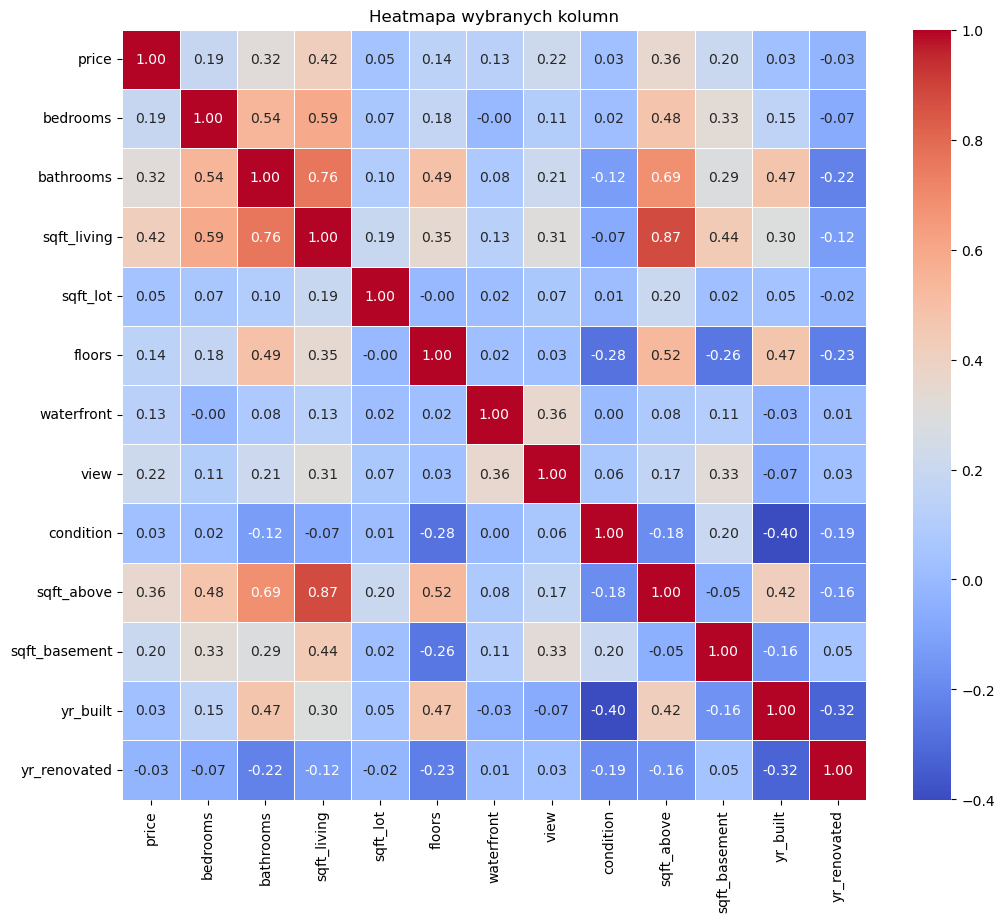

In [10]:
selected_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 
    'yr_built', 'yr_renovated'
]
filtered_data = data[selected_columns]


correlation_matrix = filtered_data.corr()


plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmapa wybranych kolumn")
plt.show()

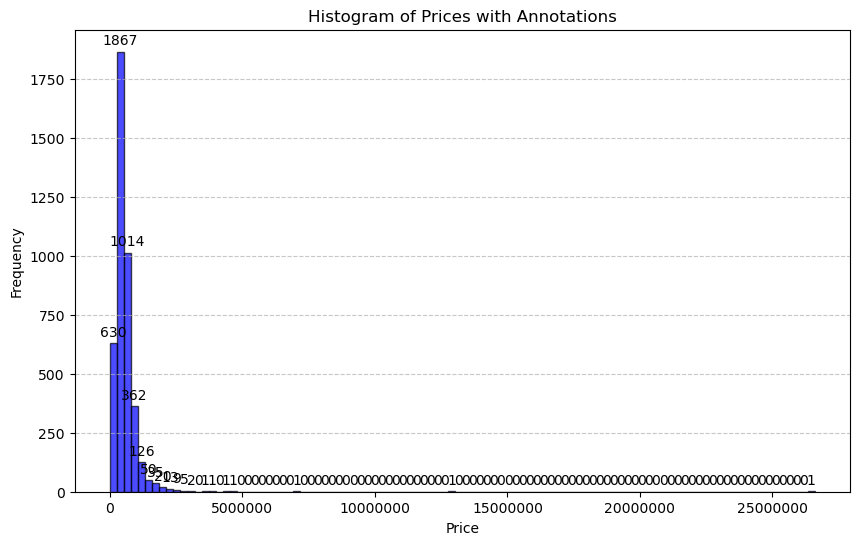

In [11]:
import matplotlib.ticker as ticker



# Plot histogram
ax = data['price'].plot.hist(bins=100, alpha=0.7, color='blue', edgecolor='black', figsize=(10, 6))

# Add annotations to each bar
for bar in ax.patches:  # Iterate through each bar in the histogram
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Calculate the center of each bar
    ax.annotate(f'{int(height)}', xy=(x, height), xytext=(0, 5), 
                textcoords='offset points', ha='center', fontsize=10, color='black')

# Add labels and title
plt.title("Histogram of Prices with Annotations")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation

# Show plot
plt.show()

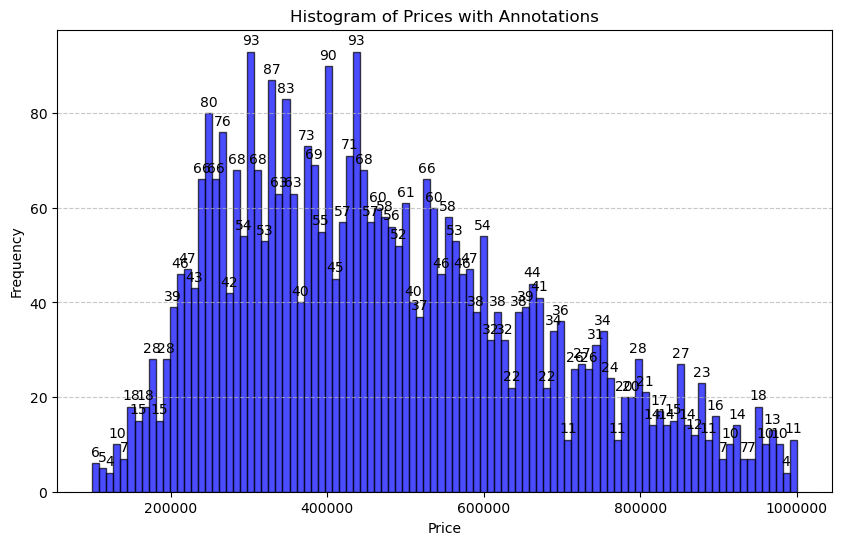

In [12]:
# Filter out rows where 'price' > 5000000
data = data[data['price'] <= 1000000]
data = data[data['price'] >= 100000]

# Plot histogram
ax = data['price'].plot.hist(bins=100, alpha=0.7, color='blue', edgecolor='black', figsize=(10, 6))

# Add annotations to each bar
for bar in ax.patches:  # Iterate through each bar in the histogram
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Calculate the center of each bar
    ax.annotate(f'{int(height)}', xy=(x, height), xytext=(0, 5), 
                textcoords='offset points', ha='center', fontsize=10, color='black')

# Add labels and title
plt.title("Histogram of Prices with Annotations")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation

# Show plot
plt.show()

In [13]:
data.drop(['country','street'], axis='columns', inplace= True)

In [14]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

data = data.drop(columns=['date'])

print(data)


              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     376000.000000       3.0       2.00         1340      1384     3.0   
1     800000.000000       4.0       3.25         3540    159430     2.0   
3     324000.000000       3.0       2.25          998       904     2.0   
4     549900.000000       5.0       2.75         3060      7015     1.0   
5     320000.000000       3.0       2.50         2130      6969     2.0   
...             ...       ...        ...          ...       ...     ...   
4135  308166.666667       3.0       1.75         1510      6360     1.0   
4136  534333.333333       3.0       2.50         1460      7573     2.0   
4137  416904.166667       3.0       2.50         3010      7014     2.0   
4138  203400.000000       4.0       2.00         2090      6630     1.0   
4139  220600.000000       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0   

In [15]:
data = pd.get_dummies(data, columns=['city', 'statezip'], drop_first=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,...,False,False,False,False,False,False,False,False,False,False
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,...,False,False,False,False,False,False,False,False,False,False
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,...,False,False,False,False,False,False,False,False,False,False
5,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,...,False,False,False,False,False,False,False,False,False,False


In [17]:
data.to_csv('Cleaned.csv', index=False)

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])  
y = data['price']                 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


REGRESJA LINIOWA    

In [19]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MAE: 41341319887883.234
R2 Score: -3.285687503099688e+19


DRZEWO DECYZYJNE

In [20]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)


y_pred = model_dt.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MAE: 99671.6299569947
R2 Score: 0.5018600871438744


RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MAE: 72493.51101488278
R2 Score: 0.7350221803288888


GRADIENT BOOST

In [22]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MAE: 65240.651343664904
R2 Score: 0.7983159652240421


REGRESJA GRZBIETOWA

In [23]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)


y_pred = model_ridge.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MAE: 63487.372287963735
R2 Score: 0.7991723683901357


REGRESJA LASSO

In [24]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)


y_pred = model_lasso.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MAE: 63852.23485260891
R2 Score: 0.7975105011962638


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+13, tolerance: 1.192e+10
  model = cd_fast.enet_coordinate_descent(
